<a href="https://colab.research.google.com/github/carolvieirav/Mova-Case-DataAnalysis/blob/main/MOVA_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Clean

In [ ]:
loan = pd.read_csv('/lc_loan.csv', encoding='latin1',sep = ",") 

In [ ]:
loan_info = pd.read_csv('/lending_club_info.csv', encoding='latin1',sep = ",")

In [ ]:
loan_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [ ]:
loan.dropna(how='all', inplace=True) # Drop rows that all values are missing 

In [ ]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [ ]:
loan.describe().columns # using describe method to visualize all numeric columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [ ]:
pd.options.display.float_format = '{:,}'.format
display(loan) # format large numbers to display it as comma seperated numbers.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,"5,000.0","5,000.0","4,975.0",36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,"24,000.0",Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,nan,nan,3.0,0.0,"13,648.0",83.7,9.0,f,0.0,0.0,"5,861.07141425","5,831.78","5,000.0",861.07,0.0,0.0,0.0,Jan-2015,171.62,NaN,Jan-2016,0.0,nan,1.0,INDIVIDUAL,nan,nan,nan,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1077430,1314167,"2,500.0","2,500.0","2,500.0",60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.0",Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0,0.0,Apr-1999,5.0,nan,nan,3.0,0.0,"1,687.0",9.4,4.0,f,0.0,0.0,"1,008.71","1,008.71",456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,nan,1.0,INDIVIDUAL,nan,nan,nan,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1077175,1313524,"2,400.0","2,400.0","2,400.0",36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,"12,252.0",Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,nan,nan,2.0,0.0,"2,956.0",98.5,10.0,f,0.0,0.0,"3,003.65364445","3,003.65","2,400.0",603.65,0.0,0.0,0.0,Jun-2014,649.91,NaN,Jan-2016,0.0,nan,1.0,INDIVIDUAL,nan,nan,nan,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,1076863,1277178,"10,000.0","10,000.0","10,000.0",36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.0",Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0,0.0,Feb-1996,1.0,35.0,nan,10.0,0.0,"5,598.0",21.0,37.0,f,0.0,0.0,"12,226.3022123","12,226.3","10,000.0","2,209.33",16.97,0.0,0.0,Jan-2015,357.48,NaN,Jan-2015,0.0,nan,1.0,INDIVIDUAL,nan,nan,nan,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1075358,1311748,"3,000.0","3,000.0","3,000.0",60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.0",Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,nan,15.0,0.0,"27,783.0",53.9,38.0,f,766.9,766.9,"3,242.17","3,242.17","2,233.1","1,009.07",0.0,0.0,0.0,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,nan,1.0,INDIVIDUAL,nan,nan,nan,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66247,8646770,10418733,"20,000.0","20,000.0","20,000.0",36 months,7.62,623.23,A,A3,NaN,NaN,RENT,"62,00

### Outlier Treatment (IQR Method)

In [ ]:
loan.shape

(66252, 74)

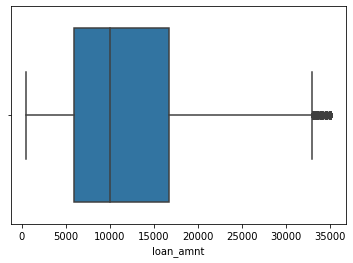

In [ ]:
sns.boxplot(data=loan,x=loan['loan_amnt']) # visualize outliers with boxplot

In [ ]:
def remove_outlier_IQR(df):

  ''' 

  Function to implement IQR method
  
  '''
  Q1=df.quantile(0.25)
  Q3=df.quantile(0.75)
  IQR=Q3-Q1
  df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
  return df_final

  loan = remove_outlier_IQR(loan)

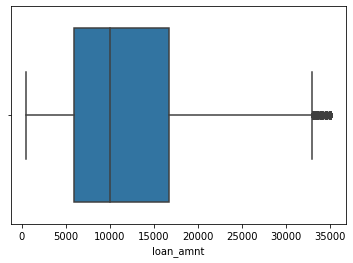

In [ ]:
sns.boxplot(data=loan,x=loan['loan_amnt'])

# Exploratory Analysis

In [ ]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [ ]:
loan.corr()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,1.0,0.981036231189951,0.2251860140621533,0.24533007967214537,0.28759100169341,0.2503100275307904,0.2713072599349821,0.05038856465886615,0.2613848528693456,0.11618937004888158,-0.0973645784417798,-0.031656498047047836,0.2857076451184339,0.2039016093719841,0.1291337423517482,0.04583518898986601,0.1599339581419396,0.14958504904410275,0.4836038644917888,0.48367817484090286,0.04880958471428012,0.09147115321555345,0.016684163550976575,0.11655191927372978,-0.06587430909945079,0.006966083278434789,-0.0077954659481201385,0.10533137146022681,0.056871884706807124,0.011981401224150492,nan,nan,nan,nan,0.04143355856922898,0.017507888361191555,-0.01168673632312427,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.04711401767281489,nan,nan,nan
member_id,0.981036231189951,1.0,0.2228446913110915,0.24263255658936161,0.28487386901239053,0.2390348941193931,0.2668502470250108,0.04950725796121954,0.251521990593958,0.11199554496294487,-0.09857582802768325,-0.029048208532475236,0.29536258456775594,0.19399091244338057,0.1252940638010938,0.04444225558721373,0.155736383328744,0.14127409250353984,0.4772532778618771,0.47732368942449577,0.04853006942126806,0.09112899140932344,0.01735029428026564,0.11402180451851021,-0.06650921464611295,0.00613106456567977,-0.008316261995634193,0.10283565816462492,0.05513317958032607,-0.0011385943746468992,nan,nan,nan,nan,0.04007167020449529,0.005972485433712954,-0.001631252548453144,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.009425119203938435,nan,nan,nan
loan_amnt,0.2251860140621533,0.2228446913110915,1.0,0.9896113061124676,0.9597745421994903,0.2545227812344769,0.9441230739933285,0.3195446255555612,0.11195302749482945,0.015588812169368943,-0.0368823760912496,-0.019926782502058808,0.07739999371201532,0.2236735443453406,-0.042042724087683205,0.2782558373057347,0.11007445866243691,0.2700784473895333,0.40470761287778095,0.4045620103401183,0.8533277747739454,0.836103528592532,0.7661793664839248,0.7385561947898392,0.023686930408591843,0.1288236751193538,0.06983220530188806,0.3896447102438507,0.0023980898414680983,-0.09275433649390674,nan,nan,nan,nan,0.01258998100011478,-0.017884124393884995,0.3226901758928281,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.3267669859579647,nan,nan,nan
funded_amnt,0.24533007967214537,0.24263255658936161,0.9896113061124676,1.0,0.9712804378555467,0.258551155725353,0.9593438985072404,0.31639877875589295,0.11658707036424461,0.01801847048633856,-0.03808415596906287,-0.020556918775132268,0.07704312600300373,0.22600204340486715,-0.040234847611679336,0.27573127518171275,0.11522702342577162,0.26797430158008934,0.41835974830579425,0.41822985112781214,0.85805965775966,0.8419677711826087,0.7712026867237104,0.7407876625023624,0.023537576145882345,0.12860724659628317,0.07046383393577878,0.39159989761263897,0.0033720893649867075,-0.09275433649390674,nan,nan,nan,nan,0.013553841102738743,-0.017884124393884995,0.3226901758928281,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.3267669859579647,nan,nan,nan
funded_amnt_inv,0.28759100169341,0.28487386901239053,0.9597745421994903,0.9712804378555467,1.0,0.25823732341566047,0.9257377983502597,0.3024960011623629,0.1294586636316707,0.01777800655634833,-0.0701791350548273,0.01883929110621718,0.3706643278684248,0.22185908187409328,-0.035805618627912955,0.252736118687858,0.120938225612749

In [ ]:
def info(x):

  '''
  Funtion to visualize the description of each column in the 'loan' DataFrame
  '''
  
  print(loan_info.loc[x]['Description'])



## Univariate Analysis

loan_status

In [ ]:
loan.loan_status.nunique()

9

In [ ]:
loan.loan_status.value_counts()

Fully Paid                                             40633
Current                                                14450
Charged Off                                             7640
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                       452
In Grace Period                                          207
Late (16-30 days)                                         74
Default                                                   47
Name: loan_status, dtype: int64

In [77]:
# dividing loans status between "defaulted" or "not defaulted" by assigning a binary atribute in a python dictionary 
# 0 means Not Defaulted, 1 means Defaulted.
loan_status_dic ={'Late (31-120 days)':1,'Late (16-30 days)':1,'Default':1,'Charged Off':1,"Does not meet the credit policy. Status:Charged Off":1,'Current':0,'Fully Paid':0,'In Grace Period':0, "Does not meet the credit policy. Status:Fully Paid":0}


In [78]:
loan['loan_status_bi'] = loan['loan_status'].map(loan_status_dic)

In [79]:
loan.loan_status_bi.value_counts()

Series([], Name: loan_status_bi, dtype: int64)

In [80]:
sum(loan.loan_status==1)

573

In [81]:
sum(loan.loan_status==0)

65679

loan_amnt

In [82]:
loan.loan_amnt.describe()

count              66,252.0
mean    12,412.874328322165
std     7,932.9266007634205
min                   500.0
25%                 6,000.0
50%                10,000.0
75%                16,750.0
max                35,000.0
Name: loan_amnt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


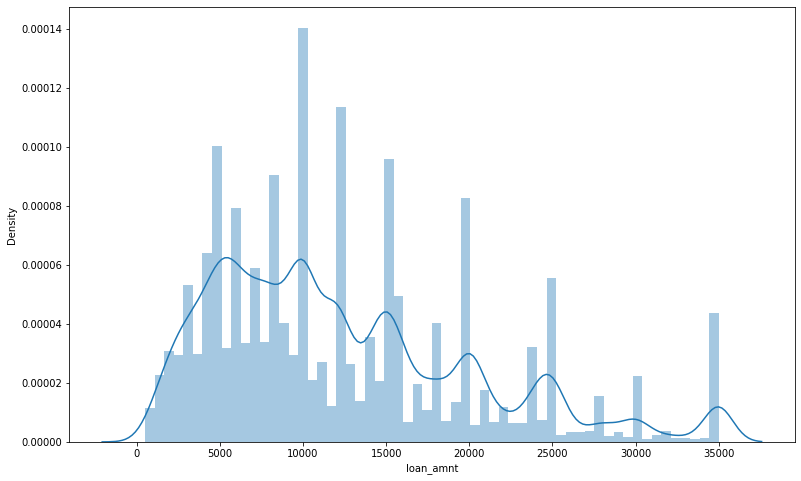

In [83]:
plt.figure(figsize=(13,8))
sns.distplot(loan["loan_amnt"],kde=True,bins=60);

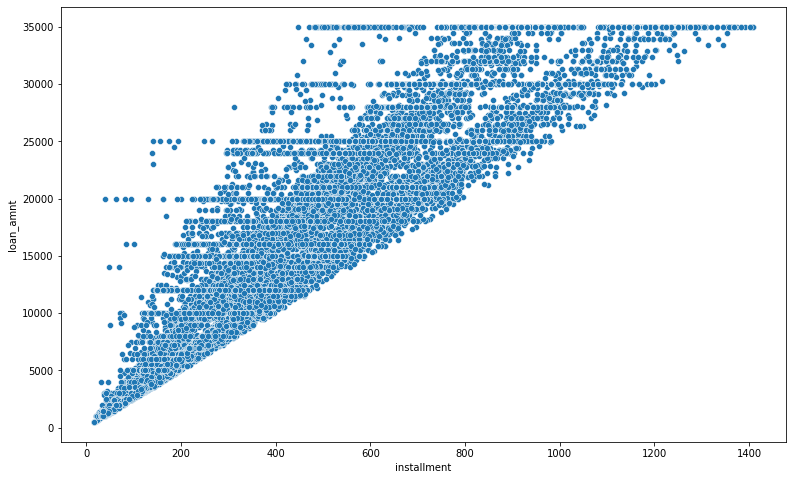

In [84]:
plt.figure(figsize=(13,8))
sns.scatterplot(x="installment",y="loan_amnt",data=loan);

# "Installments" are the monthly payment owed by the borrower if the loan originates.
# the following scatter plot show how much installments the borrower have to pay monthly for each listed loan amount.


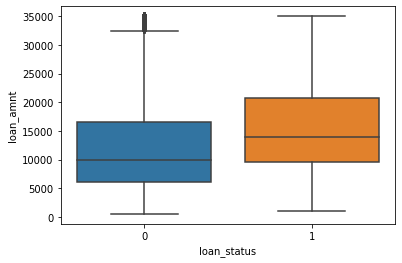

In [85]:
sns.boxplot(x="loan_status",y="loan_amnt",data=loan);
# shows the relation between the amount of money borrowed and the default status of the loan

In [86]:
loan.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"65,679.0","12,385.90873795277","7,922.713654422872",500.0,"6,000.0","10,000.0","16,637.5","35,000.0"
1,573.0,"15,503.752181500873","8,484.162866798753","1,000.0","9,600.0","14,000.0","20,800.0","35,000.0"


Returns on Investment of LendingClub

In [89]:
x = loan.groupby("loan_status")["total_pymnt"].sum()
y = loan.groupby("loan_status")["funded_amnt"].sum()

lost = 100*(x-y)/y
deficit= lost[1]
deficit

-23.735483262611975

In [ ]:
loan_status=='Fully Paid',total_pymnt